In [ ]:
import random
from random import uniform
from pprint import pprint

In [ ]:
TAMANHO = 100
itens = []
individuos = []

In [ ]:
def adicionaItens():
  from random import randint
  for i in range(30):
    itens.append({'Nome': f'Item {i}', 'Tamanho': randint(1, 15), 'Valor': randint(1, 10)})

In [ ]:
adicionaItens()

In [ ]:
for i in range(70):
  itens.append({'Nome': f'Item {i}', 'Tamanho': 1, 'Valor': 10})

In [ ]:
print(itens)

[{'Nome': 'Item 0', 'Tamanho': 4, 'Valor': 10}, {'Nome': 'Item 1', 'Tamanho': 4, 'Valor': 6}, {'Nome': 'Item 2', 'Tamanho': 5, 'Valor': 8}, {'Nome': 'Item 3', 'Tamanho': 5, 'Valor': 5}, {'Nome': 'Item 4', 'Tamanho': 5, 'Valor': 7}, {'Nome': 'Item 5', 'Tamanho': 11, 'Valor': 5}, {'Nome': 'Item 6', 'Tamanho': 4, 'Valor': 8}, {'Nome': 'Item 7', 'Tamanho': 5, 'Valor': 6}, {'Nome': 'Item 8', 'Tamanho': 13, 'Valor': 9}, {'Nome': 'Item 9', 'Tamanho': 6, 'Valor': 5}, {'Nome': 'Item 10', 'Tamanho': 5, 'Valor': 10}, {'Nome': 'Item 11', 'Tamanho': 7, 'Valor': 10}, {'Nome': 'Item 12', 'Tamanho': 15, 'Valor': 8}, {'Nome': 'Item 13', 'Tamanho': 7, 'Valor': 10}, {'Nome': 'Item 14', 'Tamanho': 14, 'Valor': 3}, {'Nome': 'Item 15', 'Tamanho': 14, 'Valor': 6}, {'Nome': 'Item 16', 'Tamanho': 2, 'Valor': 3}, {'Nome': 'Item 17', 'Tamanho': 7, 'Valor': 5}, {'Nome': 'Item 18', 'Tamanho': 5, 'Valor': 6}, {'Nome': 'Item 19', 'Tamanho': 14, 'Valor': 9}, {'Nome': 'Item 20', 'Tamanho': 11, 'Valor': 6}, {'Nome': 'I

In [ ]:
def geraIndividuos(tamanhoPopulação):
  for i in range(tamanhoPopulação):
    individuo = []
    for i in range(len(itens)):
      if random.uniform(0, 1) > 0.5:
        individuo.append(1)
      else:
        individuo.append(0)
    individuos.append({'genes': individuo, 'nota': None})

In [ ]:
geraIndividuos(70)

In [ ]:
print(itens)

[{'Nome': 'Item 0', 'Tamanho': 4, 'Valor': 10}, {'Nome': 'Item 1', 'Tamanho': 4, 'Valor': 6}, {'Nome': 'Item 2', 'Tamanho': 5, 'Valor': 8}, {'Nome': 'Item 3', 'Tamanho': 5, 'Valor': 5}, {'Nome': 'Item 4', 'Tamanho': 5, 'Valor': 7}, {'Nome': 'Item 5', 'Tamanho': 11, 'Valor': 5}, {'Nome': 'Item 6', 'Tamanho': 4, 'Valor': 8}, {'Nome': 'Item 7', 'Tamanho': 5, 'Valor': 6}, {'Nome': 'Item 8', 'Tamanho': 13, 'Valor': 9}, {'Nome': 'Item 9', 'Tamanho': 6, 'Valor': 5}, {'Nome': 'Item 10', 'Tamanho': 5, 'Valor': 10}, {'Nome': 'Item 11', 'Tamanho': 7, 'Valor': 10}, {'Nome': 'Item 12', 'Tamanho': 15, 'Valor': 8}, {'Nome': 'Item 13', 'Tamanho': 7, 'Valor': 10}, {'Nome': 'Item 14', 'Tamanho': 14, 'Valor': 3}, {'Nome': 'Item 15', 'Tamanho': 14, 'Valor': 6}, {'Nome': 'Item 16', 'Tamanho': 2, 'Valor': 3}, {'Nome': 'Item 17', 'Tamanho': 7, 'Valor': 5}, {'Nome': 'Item 18', 'Tamanho': 5, 'Valor': 6}, {'Nome': 'Item 19', 'Tamanho': 14, 'Valor': 9}, {'Nome': 'Item 20', 'Tamanho': 11, 'Valor': 6}, {'Nome': 'I

In [ ]:
def avalia():
  for i in range(len(individuos)):
    nota = 0
    tamanho = 0
    for j in range(len(individuos[i]['genes'])):
      if individuos[i]['genes'][j] == 1:
        nota += itens[j]['Valor']
        tamanho += itens[j]['Tamanho']
    if tamanho > TAMANHO:
      nota = 0
    
    individuos[i]['nota'] = nota
    

In [ ]:
avalia()

In [ ]:
def somaNotas():
  somatoria = 0
  for i in range(len(individuos)):
    somatoria += individuos[i]['nota']
  return somatoria

In [ ]:
somaNotas()

0

In [ ]:
def selecionaIndividuos():
  pais =  []
  for i in range(2):
    soma = 0
    valorSorteado = random.random() * somaNotas()
    i = 0
    pai = -1
    if valorSorteado == 0:
      return random.randint(0, len(individuos)-1), random.randint(0, len(individuos)-1)
    else:
      while i < len(individuos) and soma < valorSorteado:
        soma += individuos[i]['nota']
        pai += 1
        i += 1
      pais.append(pai)
  return pais

In [ ]:
selecionaIndividuos()

(63, 50)

In [ ]:
def crossOver():
  pai1, pai2 = selecionaIndividuos()
  corte = random.randint(0+1, len(individuos[0]['genes'])-1)
  filho1 = individuos[pai1]['genes'][0:corte] + individuos[pai2]['genes'][corte:len(individuos[0]['genes'])]
  filho2 = individuos[pai1]['genes'][corte::] + individuos[pai2]['genes'][0:corte]
  return filho1, filho2

In [ ]:
def mutacao(gene):
  qntMutacao = random.randint(1, len(gene)-80)
  for i in range(qntMutacao):
    posicaoMutacao = random.randint(1, len(gene)-1)
    if random.random() > 0.5:
      gene[posicaoMutacao] = 1
    else:
      gene[posicaoMutacao] = 0
  return gene

In [ ]:
def NovaPopulacao(epocas):
  notasGerais = []
  for j in range(epocas):
    notasGerais.append(somaNotas())
    geracao = []
    for i in range(50):
      filho1, filho2 = crossOver()
      if random.random() > 0.70:
        filho1 = mutacao(filho1)
        filho2 = mutacao(filho2)

      geracao.append({'genes': filho1, 'nota': None})
      geracao.append({'genes': filho1, 'nota': None})

    individuos.clear()
    for i in range(len(geracao)):
      individuos.append(geracao[i])
    avalia()
  return notasGerais

In [ ]:
notas = NovaPopulacao(3000)

In [ ]:
notas

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


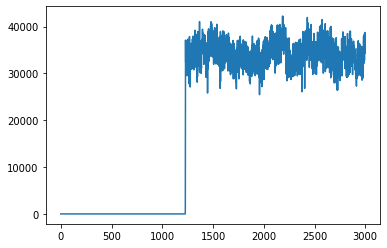

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(notas)), notas)

In [ ]:
notas[len(notas)-1]

36668